In [1]:
import pandas as pd

df= pd.read_csv('Avocado_HassAvocadoBoard_20152023v1.0.1.csv')
df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


In [2]:
df.region.unique()
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [3]:
#checking for duplicates, if there are duplicates .
df.duplicated().sum()


0

#No Duplicates are found.

In [4]:
df.isnull().sum()

Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
dtype: int64

since there are nulls only in SmallBags, LargeBags, XLargeBags , Lets try to check the nulls are specific to a region,type , date range or random.

In [5]:
#df[df['SmallBags'].isnull()]['region'].value_counts()
#df[df['SmallBags'].isnull()]['type'].value_counts()
df[df['SmallBags'].isnull()]['Date'].min(), df[df['SmallBags'].isnull()]['Date'].max()

('2021-12-05', '2023-12-03')

In [6]:
#df[df['LargeBags'].isnull()]['region'].value_counts()
#df[df['LargeBags'].isnull()]['type'].value_counts()
df[df['LargeBags'].isnull()]['Date'].min(), df[df['LargeBags'].isnull()]['Date'].max()

('2021-12-05', '2023-12-03')

In [7]:

#df[df['XLargeBags'].isnull()]['region'].value_counts()
#df[df['XLargeBags'].isnull()]['type'].value_counts()
df[df['XLargeBags'].isnull()]['Date'].min(), df[df['XLargeBags'].isnull()]['Date'].max()

('2021-12-05', '2023-12-03')

#Looks like SmallBags, LargeBags, XLargeBags are consistent with Region and Type -[conventional-6195, organic -6195] missing values, so the missing is not random and the data is structured.

In [8]:
# we will perform preprocessing on the copy dataset not the original.
df_copy =df.copy()

Now filling  missing/ null values as 0

In [9]:
df_copy[['SmallBags', 'LargeBags', 'XLargeBags']] = df_copy[['SmallBags', 'LargeBags', 'XLargeBags']].fillna(0)


In [10]:
df_copy.isnull().sum()

Date            0
AveragePrice    0
TotalVolume     0
plu4046         0
plu4225         0
plu4770         0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
region          0
dtype: int64

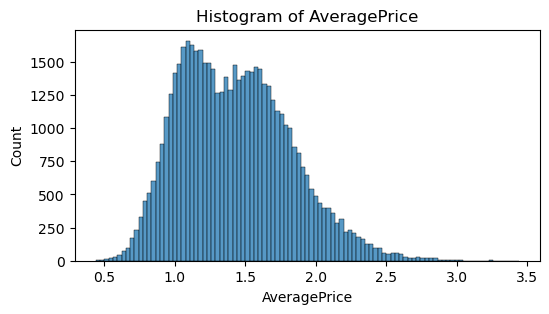

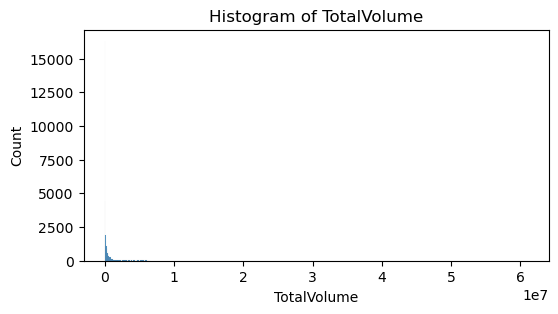

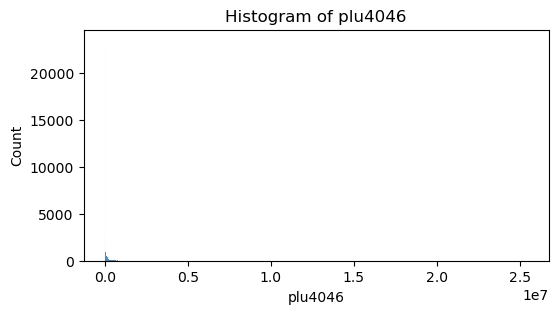

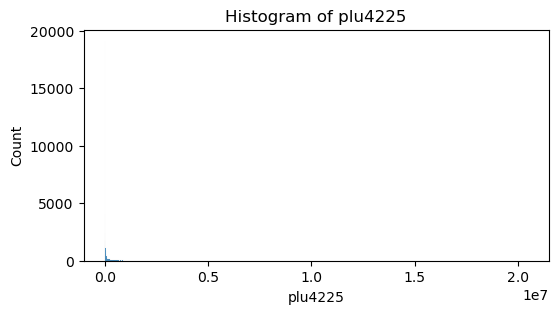

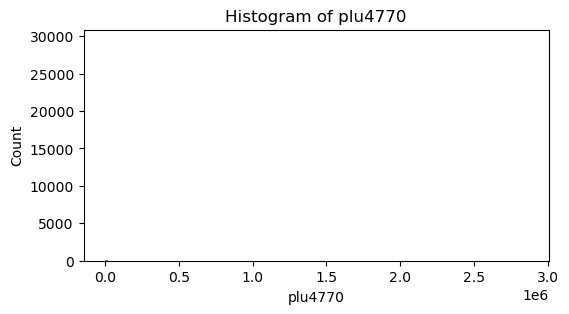

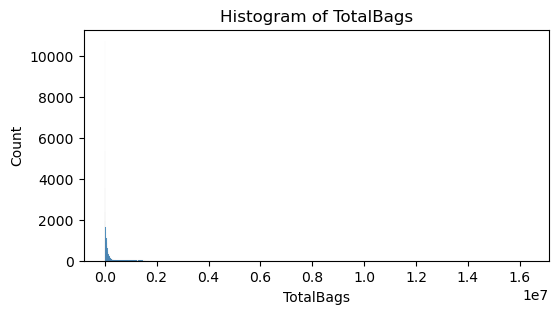

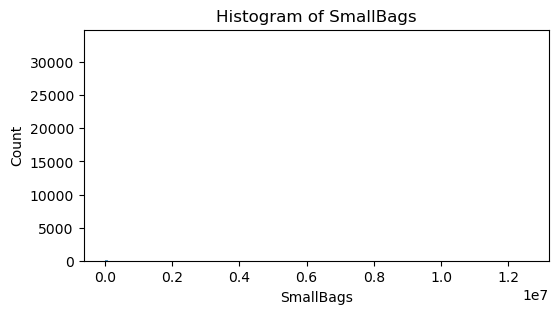

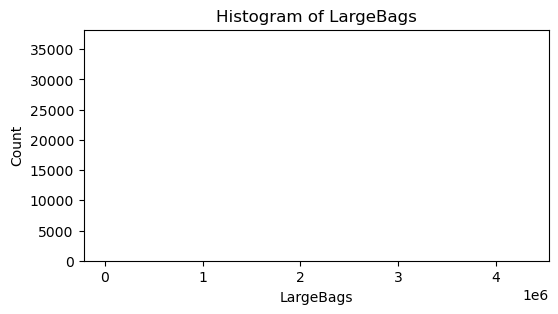

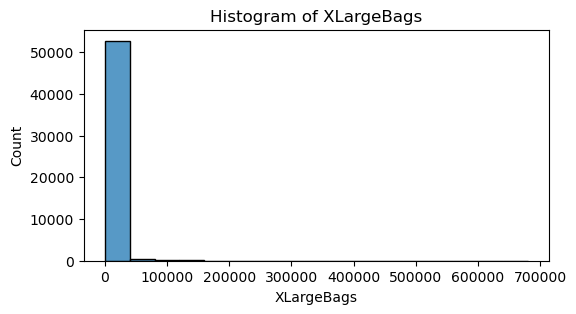

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['AveragePrice', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770',
                'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(x=df_copy[col])
   # sns.boxplot(x=df_copy[col])
    plt.title(f'Histogram of {col}')
    plt.show()

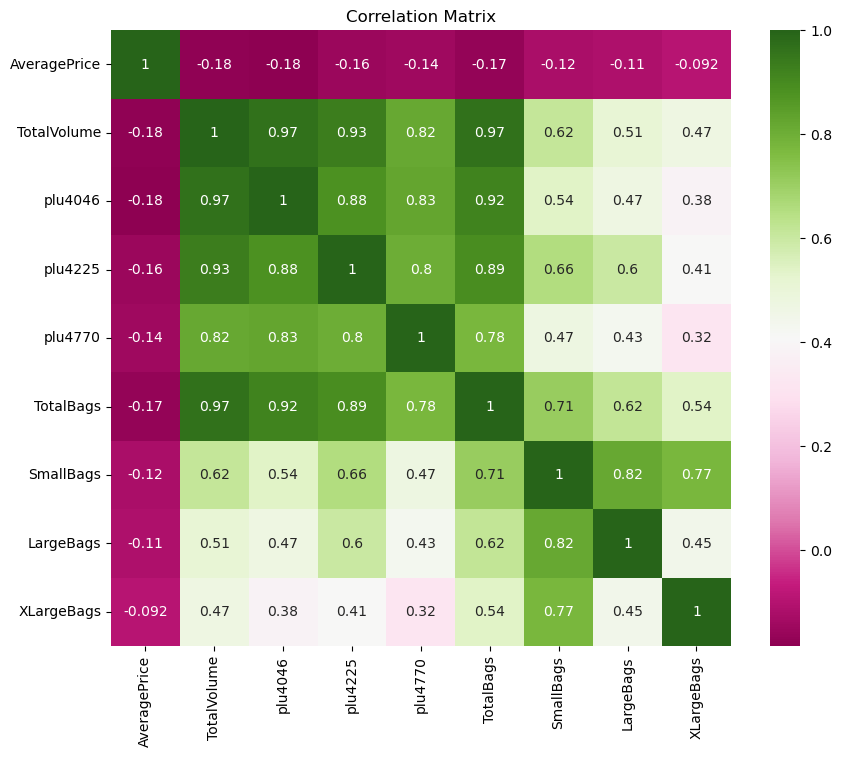

In [12]:
corr = df_copy[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='PiYG')
plt.title("Correlation Matrix")
plt.show()

In [13]:
df_copy['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'Miami', 'Midsouth',
       'Nashville', 'NewOrleans', 'NewYork', 'Northeast',
       'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson',
       'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro',
       'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego',
       'SanFrancisco', 'Seattle', 'SouthCarolina', 'SouthCentral',
       'Southeast', 'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'TotalUS',
       'West', 'WestTexNewMexico', 'BirminghamMontgomery',
       'PeoriaSpringfield', 'Providence', 'Toledo', 'Wichita',
       'MiamiFtLauderdale'], dtype=object)

In [14]:

regional_sales = df_copy.groupby(['region','type'], as_index=False)['TotalVolume'].sum().sort_values(by='TotalVolume', ascending=False)


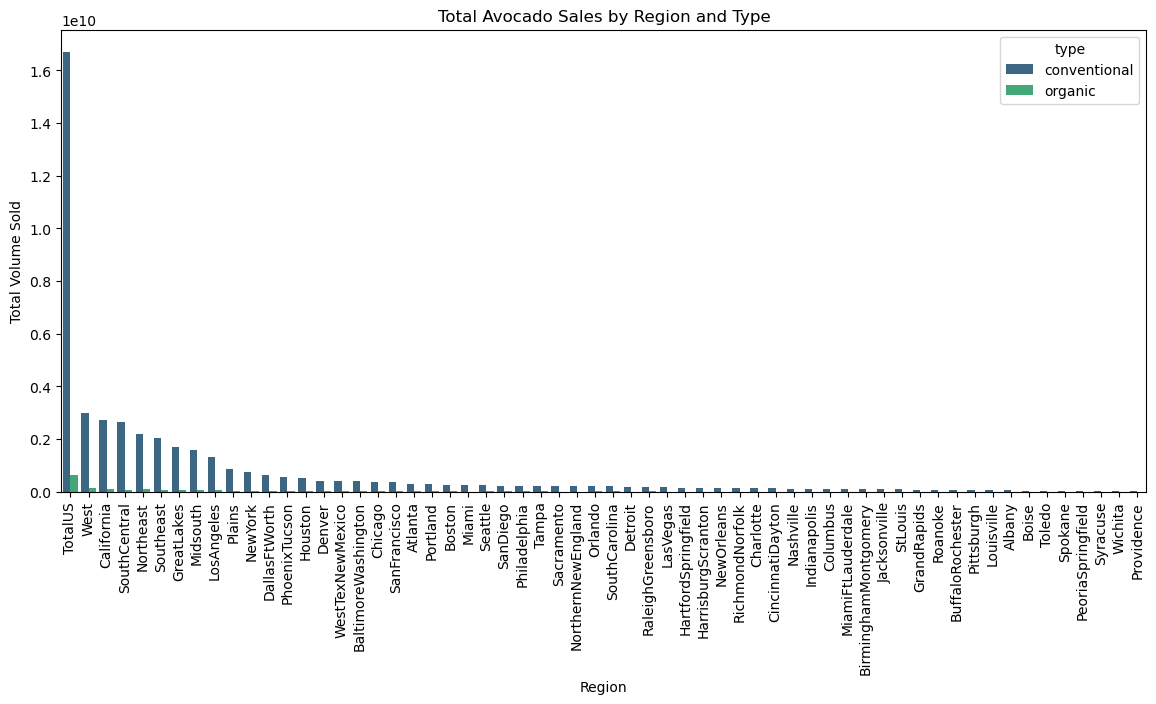

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.barplot(data=regional_sales, x='region', y='TotalVolume', hue='type', palette='viridis')
plt.xticks(rotation=90)
plt.title('Total Avocado Sales by Region and Type')
plt.xlabel('Region')
plt.ylabel('Total Volume Sold')
plt.show()

In [16]:
#df_copy['Date'] = pd.to_datetime(df_copy['Date'])
df_copy['Date'] = pd.to_datetime(df_copy['Date'])
df_copy['Month'] = df_copy['Date'].dt.month



Should select the area... 
# Los Angeles (within California region - major metro)
# New York (visible in  chart - East Coast major market)
# Dallas/Houston area (within South Central - different market dynamics)

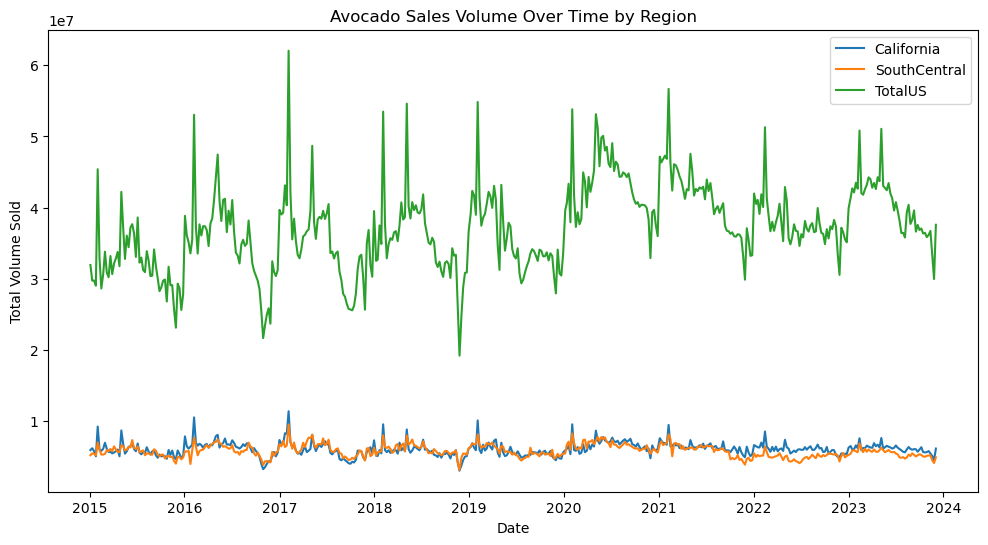

In [17]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'])


regional_trend = df_copy.groupby(['Date', 'region'], as_index=False)['TotalVolume'].sum()

#plot for a few major regions
regions_to_plot = ['California', 'SouthCentral', 'TotalUS']

plt.figure(figsize=(12,6))
for r in regions_to_plot:
    subset = regional_trend[regional_trend['region'] == r]
    plt.plot(subset['Date'], subset['TotalVolume'], label=r)

plt.legend()
plt.title('Avocado Sales Volume Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Total Volume Sold')

plt.show()

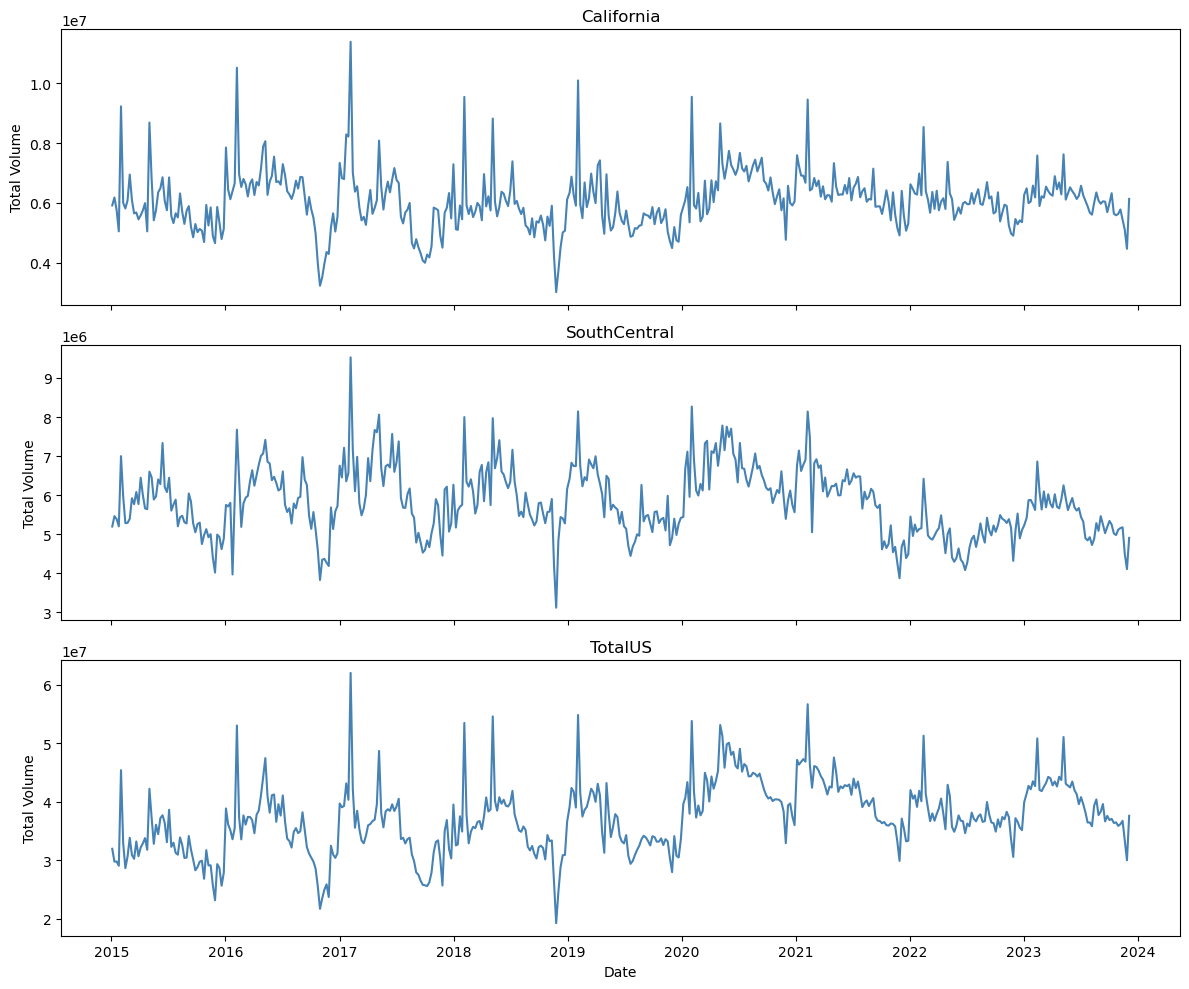

In [18]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'])


regional_trend = df_copy.groupby(['Date', 'region'], as_index=False)['TotalVolume'].sum()

#plot for a few major regions
regions_to_plot = ['California','SouthCentral', 'TotalUS']

fig, axes = plt.subplots(len(regions_to_plot), 1, figsize=(12, 10), sharex=True)
for ax, r in zip(axes, regions_to_plot):
    subset = regional_trend[regional_trend['region'] == r]
    ax.plot(subset['Date'], subset['TotalVolume'], label=r, color='steelblue')
    ax.set_title(r)
    ax.set_ylabel('Total Volume')
axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()

# colors = ['blue', 'green', 'red', 'lightblue', 'grey']
# linestyles = ['-', '--', '-.', ':', '-']

# plt.figure(figsize=(12,6))
# for i, r in enumerate(regions_to_plot):
#     subset = regional_trend[regional_trend['region'] == r]
#     plt.plot(subset['Date'], subset['TotalVolume'],
#              label=r, color=colors[i], linestyle=linestyles[i], linewidth=2)

# plt.legend()
# plt.title('Avocado Sales Volume Over Time by Region')
# plt.xlabel('Date')
# plt.ylabel('Total Volume Sold')
# plt.show()

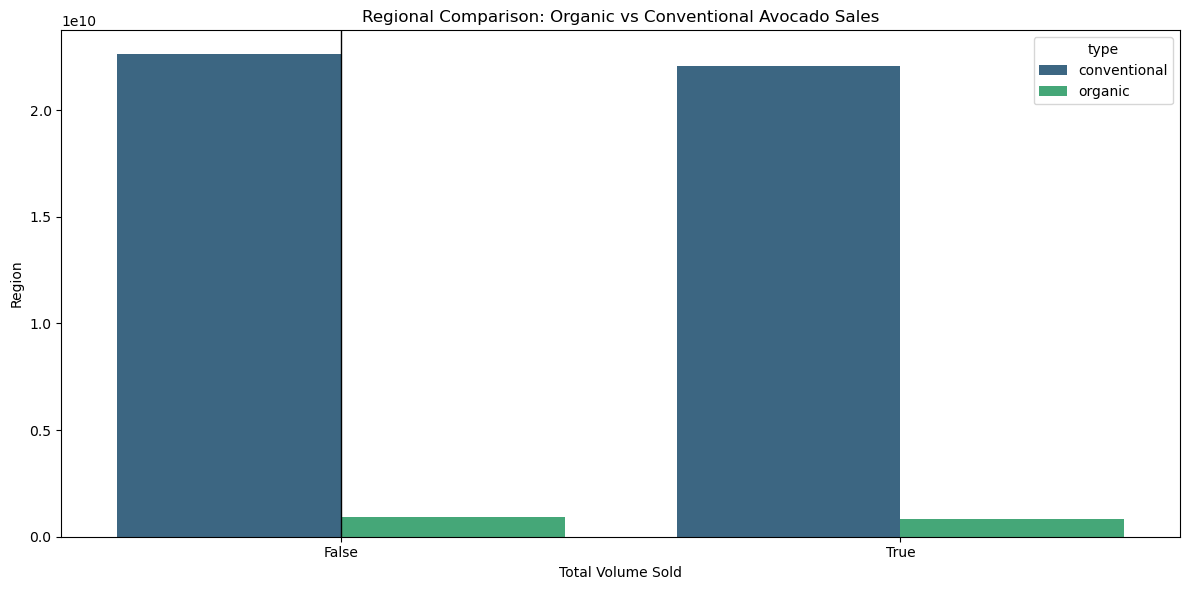

In [19]:
#checking volume of organic vs conventional in major regions.

cities_to_keep = ['California','SouthCentral', 'TotalUS']

df_copy['region_selected'] = df_copy['region'].isin(cities_to_keep)


region_type_sales = df_copy.groupby(['region_selected', 'type'], as_index=False)['TotalVolume'].sum()



plt.figure(figsize=(12,6))
sns.barplot(data=region_type_sales, y='TotalVolume',x='region_selected', hue='type',palette='viridis')
plt.title('Regional Comparison: Organic vs Conventional Avocado Sales')
plt.xlabel('Total Volume Sold')
plt.ylabel('Region')
plt.axvline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()


In [20]:
df_copy['type'].value_counts(normalize=True) * 100

type
conventional    50.002808
organic         49.997192
Name: proportion, dtype: float64

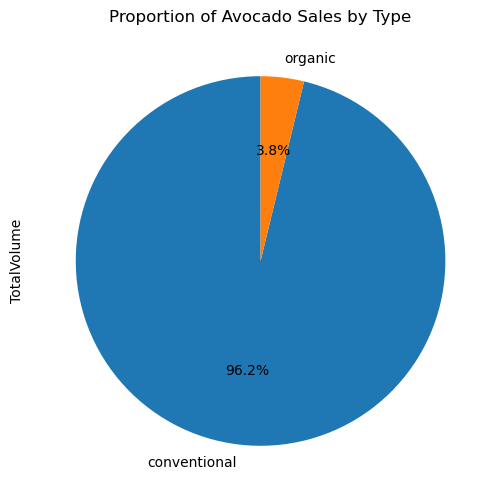

In [21]:
(df_copy.groupby('type')['TotalVolume']
   .sum()
   .apply(lambda x: x / df_copy['TotalVolume'].sum() * 100)
   .plot(kind='pie',autopct='%1.1f%%', startangle=90, figsize=(6,6), title='Proportion of Avocado Sales by Type'))
plt.show()

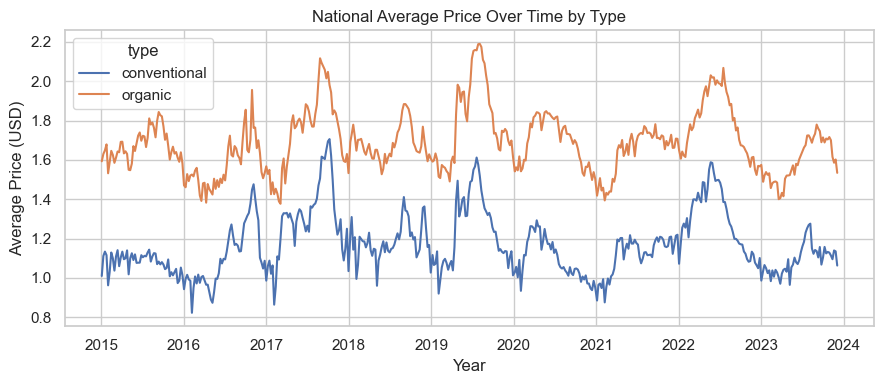

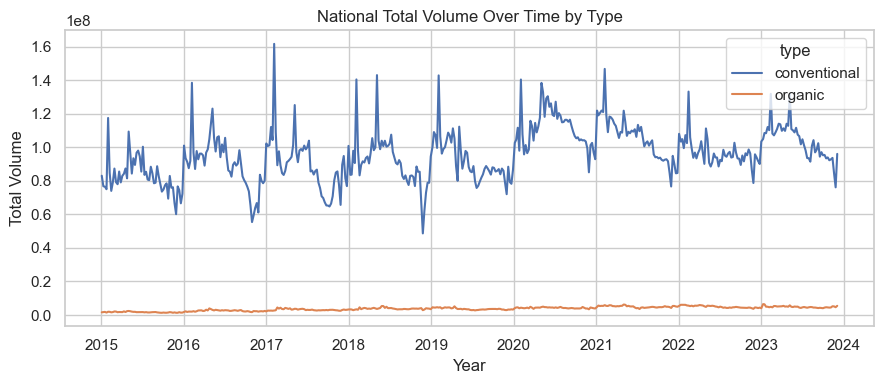

In [22]:
sns.set(style='whitegrid')
nat = df_copy.groupby(['Date','type'], as_index=False).agg(
    AveragePrice=('AveragePrice','mean'),
    TotalVolume=('TotalVolume','sum')
)

# Plot average price by type over time
plt.figure(figsize=(9,4))
sns.lineplot(data=nat, x='Date', y='AveragePrice', hue='type')
plt.title('National Average Price Over Time by Type')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.tight_layout()
plt.show()

# Plot total volume by type over time
plt.figure(figsize=(9,4))
sns.lineplot(data=nat, x='Date', y='TotalVolume', hue='type')
plt.title('National Total Volume Over Time by Type')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.tight_layout()
plt.show()


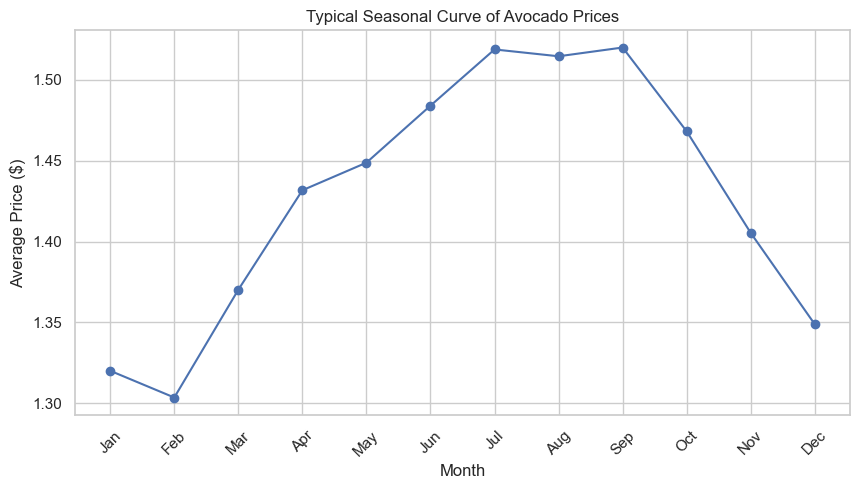

In [23]:


# Ensure Date is in datetime format
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

# Extract month number and name
df_copy['Month'] = df_copy['Date'].dt.month
df_copy['Month_Name'] = df_copy['Date'].dt.strftime('%b')

# Group by month and take the mean AveragePrice across all years
monthly_avg = df_copy.groupby('Month')['AveragePrice'].mean().reset_index()

# Optional: sort months (1–12)
monthly_avg = monthly_avg.sort_values('Month')

# Plot the typical seasonal curve
plt.figure(figsize=(10,5))
plt.plot(monthly_avg['Month'], monthly_avg['AveragePrice'], marker='o')
plt.xticks(monthly_avg['Month'], df_copy['Month_Name'].unique(), rotation=45)
plt.title('Typical Seasonal Curve of Avocado Prices')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()

In [24]:
df_copy.columns

Index(['Date', 'AveragePrice', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'region',
       'Month', 'region_selected', 'Month_Name'],
      dtype='object')

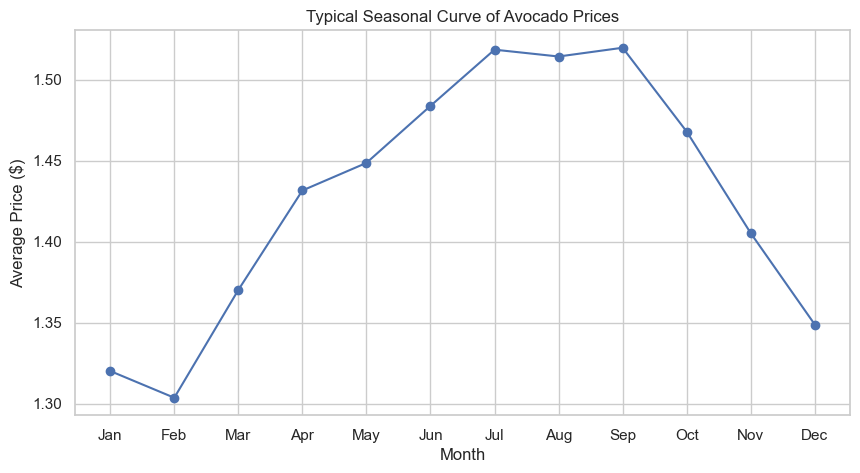

In [25]:
monthly_avg = df_copy.groupby('Month')['AveragePrice'].mean().reset_index()

# Plot the typical seasonal curve
plt.figure(figsize=(10,5))
plt.plot(monthly_avg['Month'], monthly_avg['AveragePrice'], marker='o')
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.title('Typical Seasonal Curve of Avocado Prices')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()

In [26]:
#convert organic and conventional to numerical values #LAbEL ENcoding
#df_copy['type']= df_copy['type'].map({'Conventional':0 , 'Organic':1})
#df_copy['type'].unique()
print(type(df_copy['type']))
df_copy['type'].dtype

#df_copy['type']= df_copy['type'].map({'conventional':0 , 'organic':1})

<class 'pandas.core.series.Series'>


dtype('O')

In [27]:
from sklearn.preprocessing import LabelEncoder

# Create encoder
encoder = LabelEncoder()

# Fit and transform (handles data automatically)
df_copy['type'] = encoder.fit_transform(df_copy['type'])
df_copy['type'].head()

0    0
1    1
2    0
3    1
4    0
Name: type, dtype: int64

In [28]:
#scale the numerical features 
#df_copy[numeric_cols] = scaler.fit_transform(df_copy[numeric_cols])
df_copy.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region,Month,region_selected,Month_Name
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,0,Albany,1,False,Jan
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,1,Albany,1,False,Jan
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,0,Atlanta,1,False,Jan
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,1,Atlanta,1,False,Jan
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,0,BaltimoreWashington,1,False,Jan


# Choosing Conventional Avocados because :: 
# Much higher sales volume (easier to model and more business impact)
# Clearer seasonal patterns visible in your time series
# More data points for robust forecasting

# Monthly Seasonality (Prices):

#Low prices: January-February ($1.30-$1.32) - highest supply/lowest demand
#Rising prices: March-July (gradual increase to $1.52)
#Peak prices: July-September ($1.52-$1.53) - lowest supply/highest demand
#Declining prices: October-December (drop to $1.35)

# Yearly Volume Trends:

#Conventional avocados dominate with significantly higher volumes (100M+ units)
#Organic volumes remain consistently low (under 10M units)
#Clear seasonal spikes visible in conventional sales throughout the year
#Overall trend shows some volatility but relatively stable demand from 2015-2024